In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Dataset

/content/gdrive/MyDrive/Dataset


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('heart.csv')

##Data information

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heart = pd.get_dummies(df)

In [ ]:
heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [23]:
X = heart.drop('HeartDisease', axis=1)
Y = (heart["HeartDisease"])


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [26]:
model = Sequential()


model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=60,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1,activation='sigmoid'))


# For a binary classification problem
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=[BinaryAccuracy()])

In [27]:
model.fit(X_train, y_train, epochs = 500, 
          batch_size = 62, 
          validation_data = (X_test, y_test))

Epoch 1/500
12/12 [==============================] - 1s 22ms/step - loss: 20.3173 - binary_accuracy: 0.5177 - val_loss: 2.8020 - val_binary_accuracy: 0.5109
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 11.8761 - binary_accuracy: 0.5259 - val_loss: 0.9914 - val_binary_accuracy: 0.5000
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 10.0999 - binary_accuracy: 0.5136 - val_loss: 1.5077 - val_binary_accuracy: 0.4946
Epoch 4/500
12/12 [==============================] - 0s 7ms/step - loss: 7.8616 - binary_accuracy: 0.5218 - val_loss: 0.8992 - val_binary_accuracy: 0.5272
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 6.7566 - binary_accuracy: 0.5150 - val_loss: 0.9741 - val_binary_accuracy: 0.4837
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 5.8054 - binary_accuracy: 0.5245 - val_loss: 0.8557 - val_binary_accuracy: 0.5435
Epoch 7/500
12/12 [==============================] - 0s 5ms/step -

In [28]:
model_loss = pd.DataFrame(model.history.history)

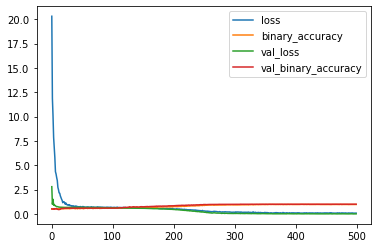

In [29]:
model_loss.plot()

NameError: ignored